# Pymaceuticals Inc.
---

### Analysis

A strong Positive correlation is found between the the weight of the mouse treated with Capomuin and average tumor volume.

The tumor volume for mouse l509 decreased over the course of the Capomulin drug regimen. The final tumor volume on the last day of treatment(day 45) was smaller compared to the initial day (day 0). Additionally, the tumor volume reached its smallest value at day 35 of the treatment.

The median final tumor volume was the smallest after the drug regimen Ramicane. 
The median final tumor volume was the highest after the Ketapril drug regimen.


 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df= pd.merge(study_results,mouse_metadata, on=["Mouse ID"], how= "left")

# Display the data table for preview
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [34]:
# Checking the number of mice.
num_mice= len(merged_df["Mouse ID"].unique())
num_mice

249

In [35]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
# Extract the Mouse ID values of the duplicate mice
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [36]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = merged_df.loc[merged_df["Mouse ID"] == "g989"]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [37]:
clean_df = merged_df.drop(merged_df[merged_df["Mouse ID"] == "g989"].index)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [38]:
#checking MouseID g898

mouse_g989 = clean_df[clean_df['Mouse ID'] == 'g989']
mouse_g989


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [39]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = len(clean_df["Mouse ID"].unique())
num_mice_clean


248

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 



# Ensure "Tumor Volume (mm3)" column is numeric

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
MeanVol= clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Median_Vol= clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Var_Vol= clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
SD_Vol = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM_Vol=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()






In [41]:
# Assemble the resulting series into a single summary DataFrame.
statistics_table_df = pd.DataFrame({
    "Mean Tumor Volume": MeanVol,
    "Median Tumor Volume": Median_Vol,
    "Tumor Volume Variance": Var_Vol,
    "Tumor Volume Std. Dev.": SD_Vol,
    "Tumor Volume Std. Err.": SEM_Vol
})

statistics_table_df.index.name = "Drug Regimen"
statistics_table_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_table = clean_df.groupby("Drug Regimen").agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})
(summary_statistics_table)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

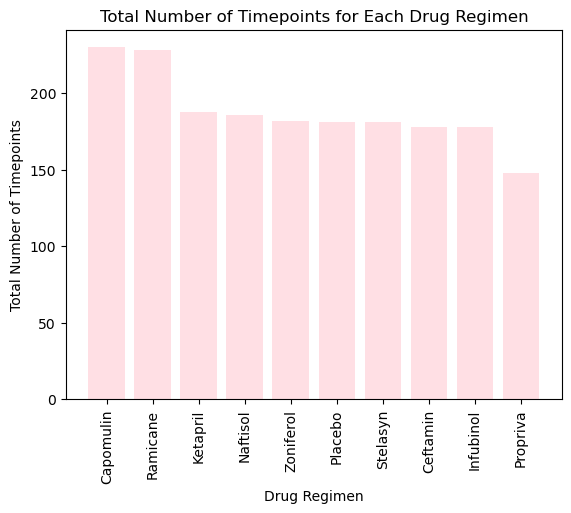

In [43]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group the data by "Drug Regimen" and count the number of timepoints for each regimen
timepoint_counts = clean_df.groupby("Drug Regimen").size()

# Sort the data in descending order based on the total number of timepoints (to match example)
timepoint_counts_sorted = timepoint_counts.sort_values(ascending=False)

# Create an array for the x-axis positions
x_values = range(len(timepoint_counts_sorted))

# Create a bar plot in descending order
plt.bar(x_values, timepoint_counts_sorted, color='pink', alpha=0.5)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Timepoints')
plt.title('Total Number of Timepoints for Each Drug Regimen')

# Set x-axis labels
plt.xticks(x_values, timepoint_counts_sorted.index, rotation='vertical')

plt.show()

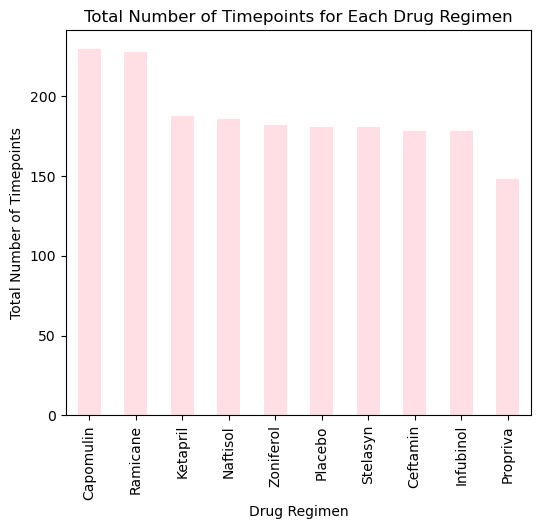

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Create a bar plot in descending order using the plot method
timepoint_counts_sorted.plot(kind='bar', figsize=(6, 5), color='pink', alpha=0.5)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Timepoints')
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xticks(rotation='vertical')

plt.show()

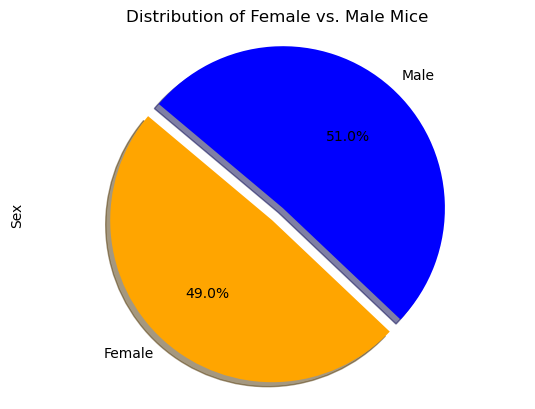

In [45]:
# Calculate the number of female and male mice #pandas 
no_female = clean_df[clean_df['Sex'] == 'Female'].shape[0]
no_male = clean_df[clean_df['Sex'] == 'Male'].shape[0]

# Calculate the percentage of female and male mice
total_mice = len(clean_df)
percentage_female = (no_female / total_mice) * 100
percentage_male = (no_male / total_mice) * 100

# Create a pie plot
labels = ['Female', 'Male']
sizes = [percentage_female, percentage_male]
colors = ['Orange', 'blue']
explode = (0.1, 0)  # Explode the Female slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.ylabel("Sex")
plt.title('Distribution of Female vs. Male Mice')
plt.show()


(-1.0999989536666621,
 1.0999999220766195,
 -1.0999997602427822,
 1.0999998796756687)

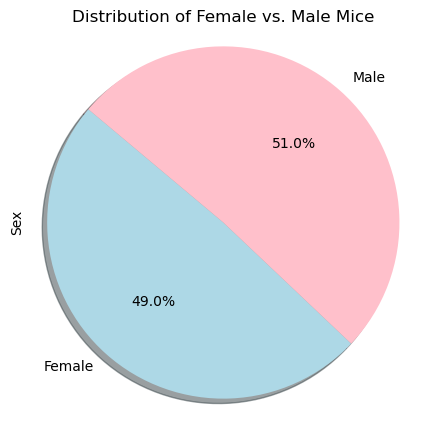

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create a DataFrame for pie plot data
pie_data = pd.Series([percentage_female, percentage_male], index=['Female', 'Male'])

pie_data.plot(kind='pie', figsize=(5, 5), colors=['lightblue', 'pink'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('Sex') 
plt.axis('equal') 

## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Filter the DataFrame to include only the specified treatment regimens
filtered_df = clean_df[clean_df["Drug Regimen"].isin(treatment_regimens)]

# Group by "Drug Regimen" and "Mouse ID" to identify the maximum timepoint for each mouse within each regimen
max_timepoints = clean_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
max_timepoints.head(30)

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
5,a401,45
6,a411,45
7,a444,45
8,a457,10
9,a492,45


In [48]:

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(max_timepoints, merged_df, on=["Mouse ID", "Timepoint"], how="left")

final_tumor_volumes











,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [49]:
outliers_list = []

for treatment in treatment_regimens:
    # Subset tumor volume data for the current treatment regimen
    tumor_vol_subset = final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Calculate quartiles and IQR
    quartiles = tumor_vol_subset.quantile([0.25,0.5,0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Calculate bounds for identifying outliers
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    
    # Identify potential outliers

    outliers = tumor_vol_subset.loc[(tumor_vol_subset < lower_bound) | (tumor_vol_subset > upper_bound)]
    print(f"Potential outliers for {treatment}: {outliers}")




Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


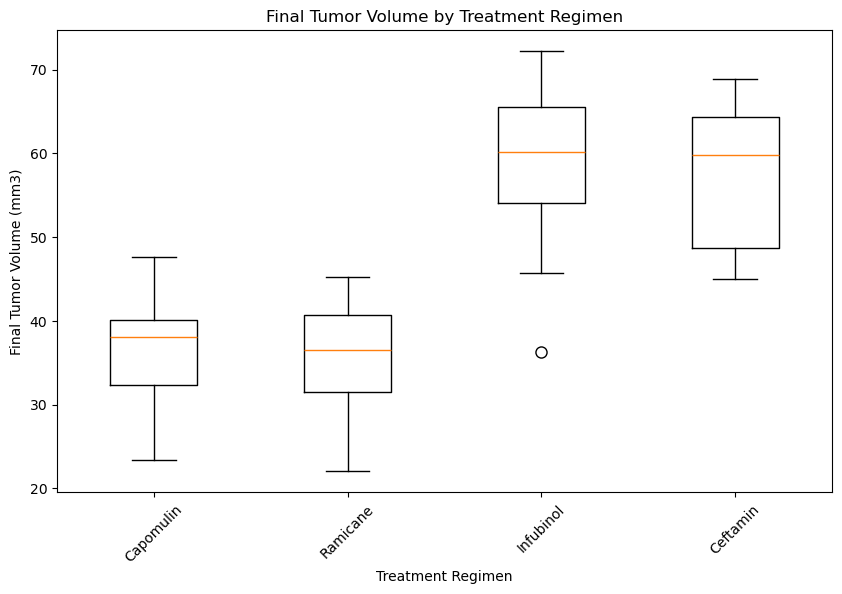

In [23]:
# Create a box plot with outlier highlighting
plt.figure(figsize=(10, 6))
plt.boxplot([final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"] == treatment, "Tumor Volume (mm3)"] for treatment in treatment_regimens],
            labels=treatment_regimens,
            flierprops=dict(marker='o', color='red', markersize=8))  # Highlight outliers in red
plt.title('Final Tumor Volume by Treatment Regimen')
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks(rotation=45)
plt.show()


## Line and Scatter Plots

In [50]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#filter data frame for single mouse and capomulin 
capomulin_l509_df = clean_df[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] == "l509")]
capomulin_l509_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


Text(0, 0.5, 'Tumor Volume (mm3)')

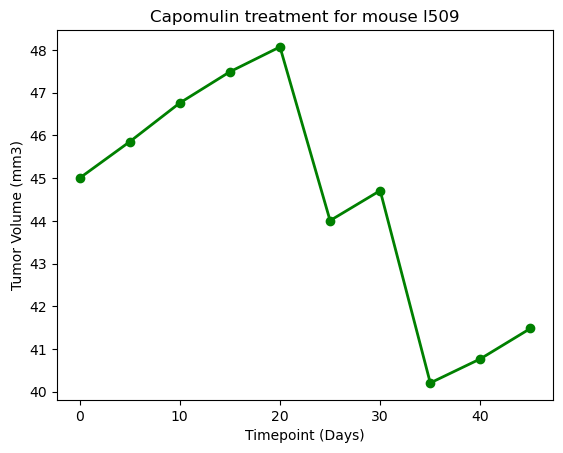

In [25]:
#line plot

 # Plotting the line plot
plt.line= plt.plot(capomulin_l509_df["Timepoint"], capomulin_l509_df["Tumor Volume (mm3)"], marker='o', color='green', linestyle='-', linewidth=2)

# Adding labels and title
plt.title("Capomulin treatment for mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")


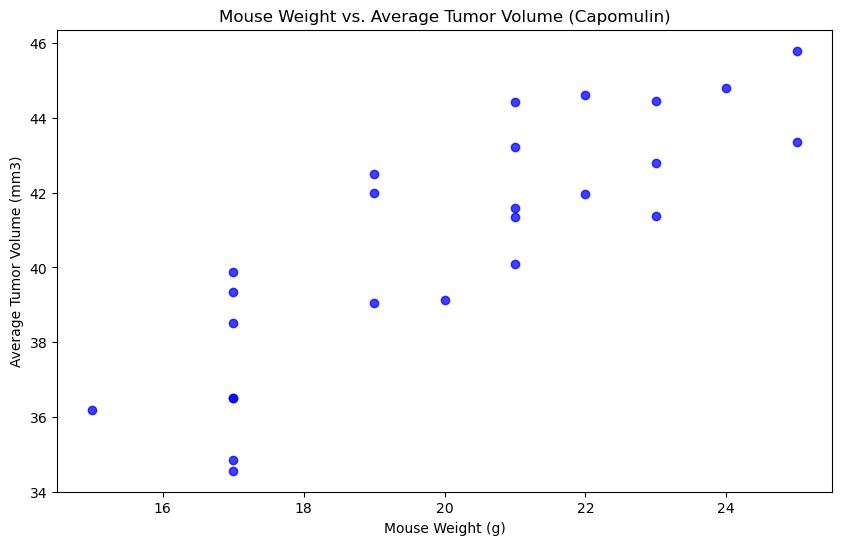

In [51]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Step 1: Group data by Mouse ID and calculate average tumor volume
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]  
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()

# Step 2: Merge mouse weight with average tumor volume
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean().reset_index()
capomulin_merge = pd.merge(avg_tumor_volume, mouse_weight, on="Mouse ID", how="left")

# Step 3: Generate scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches

plt.scatter(capomulin_merge["Weight (g)"], capomulin_merge["Tumor Volume (mm3)"], color='b', alpha=0.75)

plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between the mouse weight and the average tumor value is 0.84


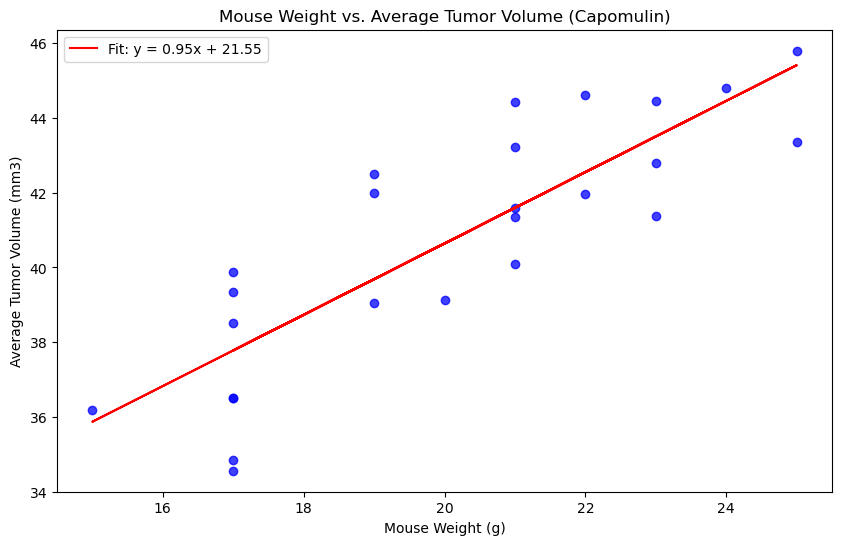

In [52]:
#filter for Capomulin 

capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]


avg_tumor_volume = capomulin_data.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})
#capomulin_merge = pd.merge(avg_tumor_volume, mouse_weight, on="Mouse ID", how="left")

# Generate scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"], color='blue', alpha=0.75)

# Calculate the regression coefficients
slope, intercept = np.polyfit(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"], 1)
# Calculate values for the regression line
regression_line = avg_tumor_volume["Weight (g)"] * slope + intercept
#Correlation calculation
coor = st.pearsonr(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"])[0]
print(f"The correlation between the mouse weight and the average tumor value is {coor:.2f}")

# Plot the regression line
plt.plot(avg_tumor_volume["Weight (g)"], regression_line, color="red", label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')

# Adding title and labels
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show legend
plt.legend()


plt.show()